### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

### Interpret best model

In [2]:
model_dir = pathlib.Path("../2.train_model/models/")

log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Compile Coefficients Matrix

In [3]:
coefs = np.abs(log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 16)


,ADCCM,Anaphase,Apoptosis,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,0.024207,0.001302,0.027031,0.033899,0.013929,0.011254,0.000596,0.000442,0.092937,0.017111,0.028206,0.032647,0.008638,0.004060,0.006635,0.096480
1,0.020895,0.012391,0.007863,0.088170,0.004009,0.021838,0.020721,0.009381,0.068417,0.013711,0.013123,0.012125,0.003362,0.003968,0.002875,0.019379
2,0.001931,0.024404,0.013351,0.025392,0.013986,0.001876,0.014006,0.002194,0.027274,0.001558,0.000059,0.027527,0.003901,0.031233,0.056875,0.018344
3,0.007517,0.001860,0.015578,0.036634,0.046671,0.011904,0.011185,0.034441,0.113092,0.000459,0.016015,0.003266,0.003091,0.023794,0.016350,0.012428
4,0.003098,0.004926,0.017938,0.003310,0.010253,0.004424,0.001946,0.018580,0.014449,0.010181,0.015908,0.006700,0.009456,0.008840,0.012666,0.021435


### Diagrams for interpreting coefficients

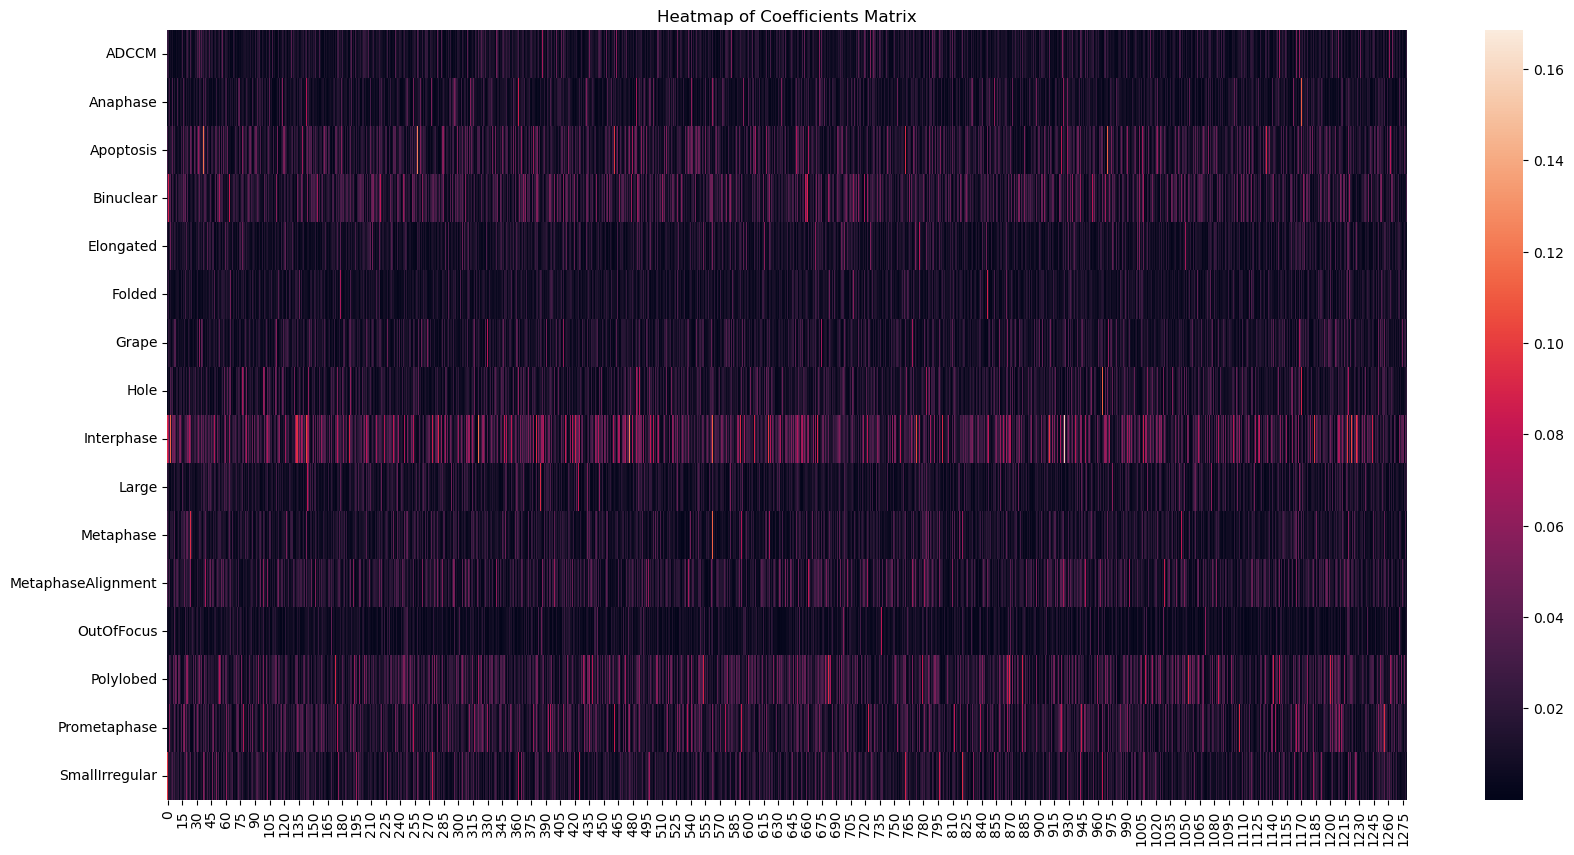

In [4]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Coefficients Matrix")
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


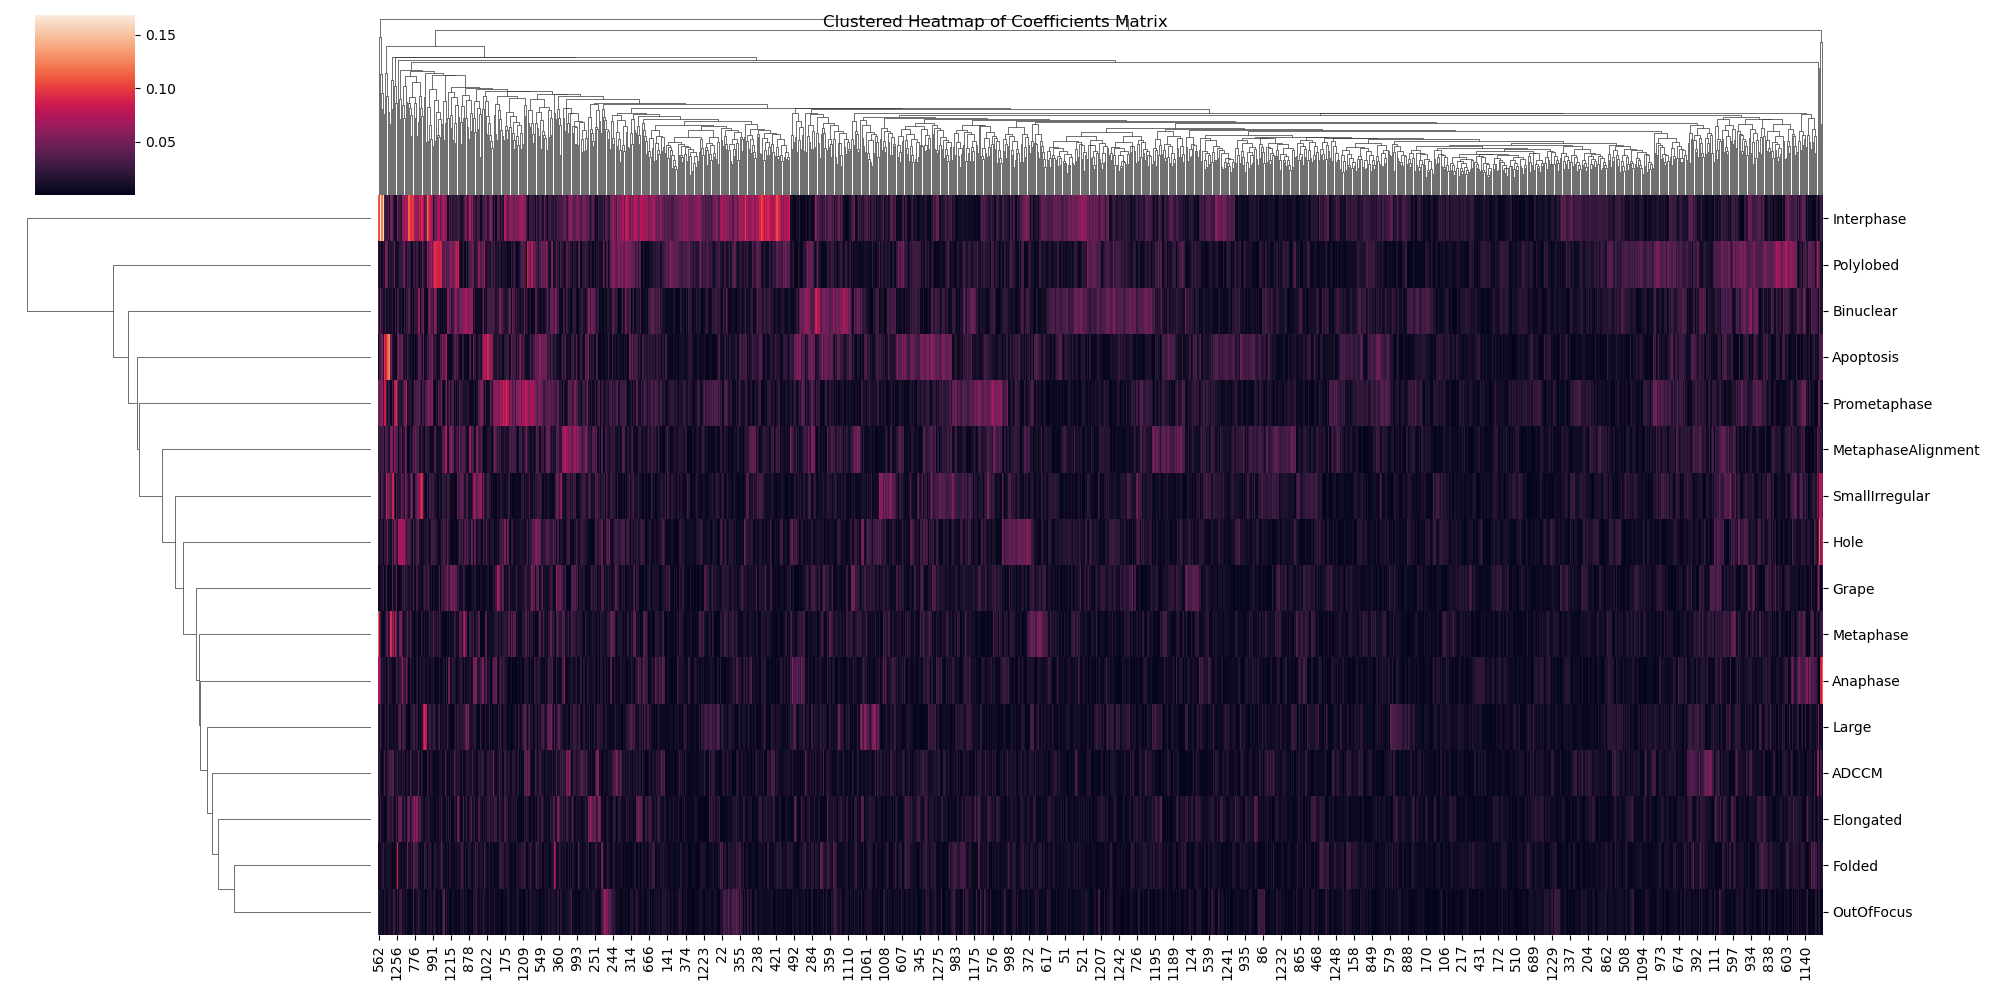

In [5]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

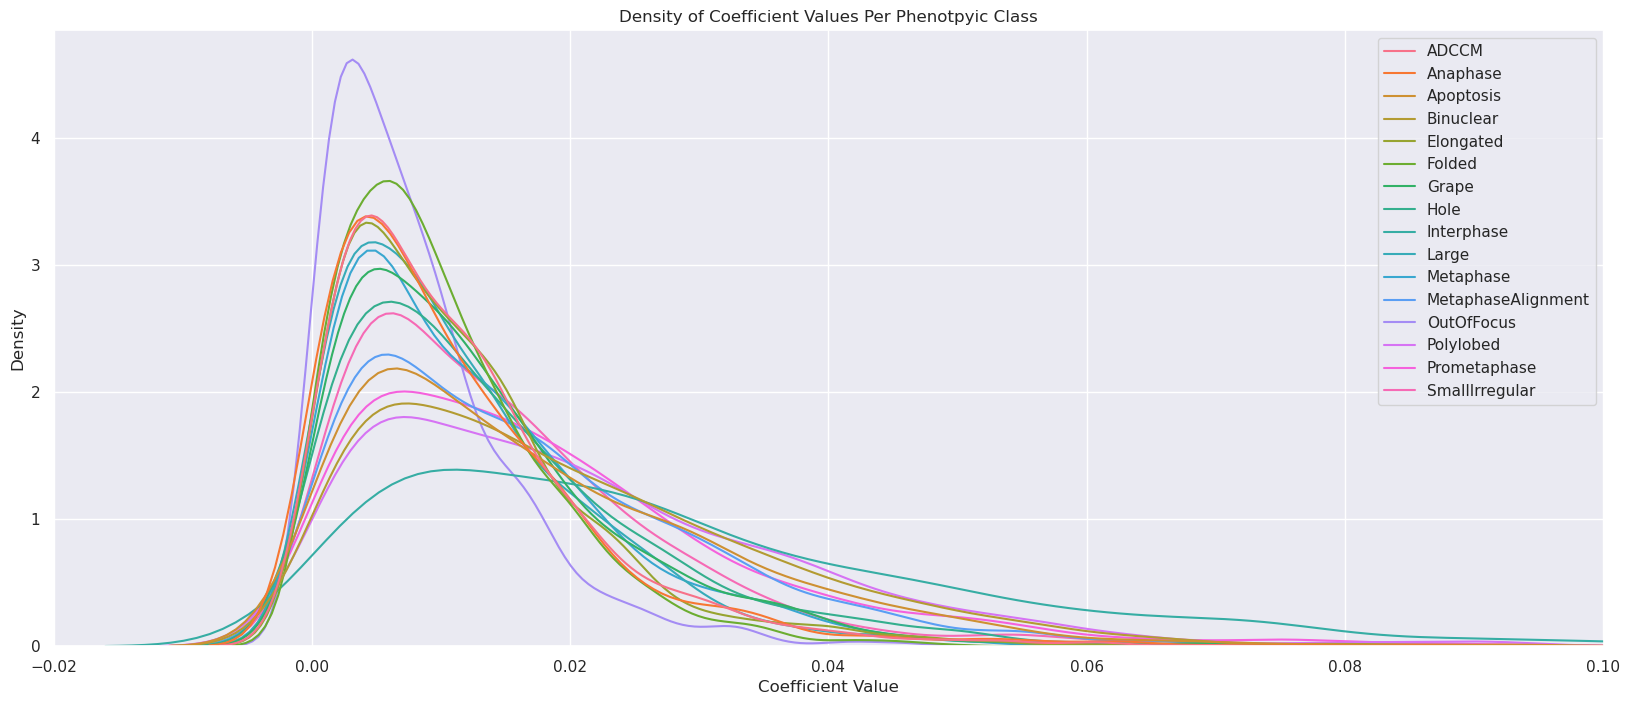

In [6]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

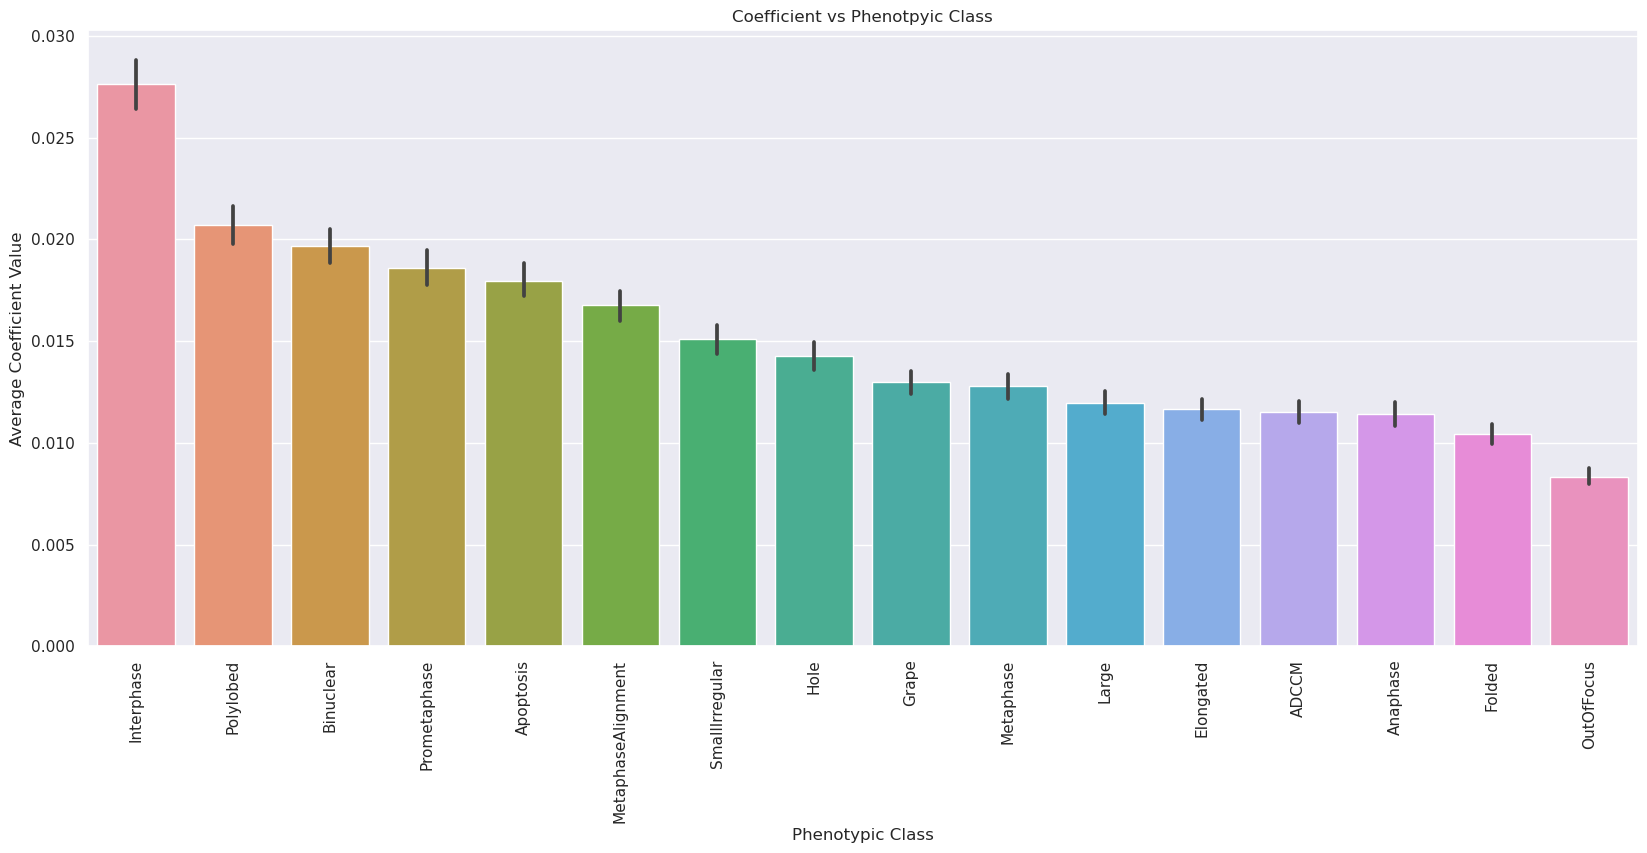

In [7]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

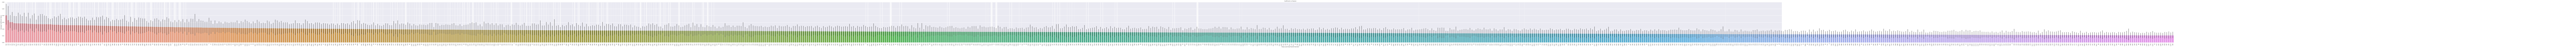

In [8]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)

### Interpret shuffled baseline model

In [9]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

### Compile Coefficients Matrix

In [10]:
coefs = np.abs(shuffled_baseline_log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = shuffled_baseline_log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 16)


,ADCCM,Anaphase,Apoptosis,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,0.018887,0.020985,0.035002,0.011865,0.093196,0.000000,0.037997,0.093741,0.019295,0.000000,0.028737,0.000000,0.085987,0.062488,0.110850,0.047342
1,0.007290,0.005904,0.072893,0.029326,0.180710,0.020426,0.036356,0.000000,0.049135,0.096246,0.065103,0.082697,0.068406,0.021466,0.131665,0.051601
2,0.012217,0.104482,0.017054,0.106565,0.017768,0.000000,0.055524,0.014638,0.059492,0.008887,0.087999,0.060494,0.051400,0.054122,0.020109,0.090842
3,0.028035,0.051379,0.045638,0.025665,0.151169,0.004638,0.033818,0.087136,0.034471,0.040363,0.000000,0.000828,0.133524,0.018390,0.003336,0.060361
4,0.001421,0.052164,0.029754,0.192360,0.082366,0.000000,0.063082,0.073345,0.028337,0.031587,0.008397,0.011786,0.103027,0.059163,0.056690,0.004270


### Diagrams for interpreting coefficients

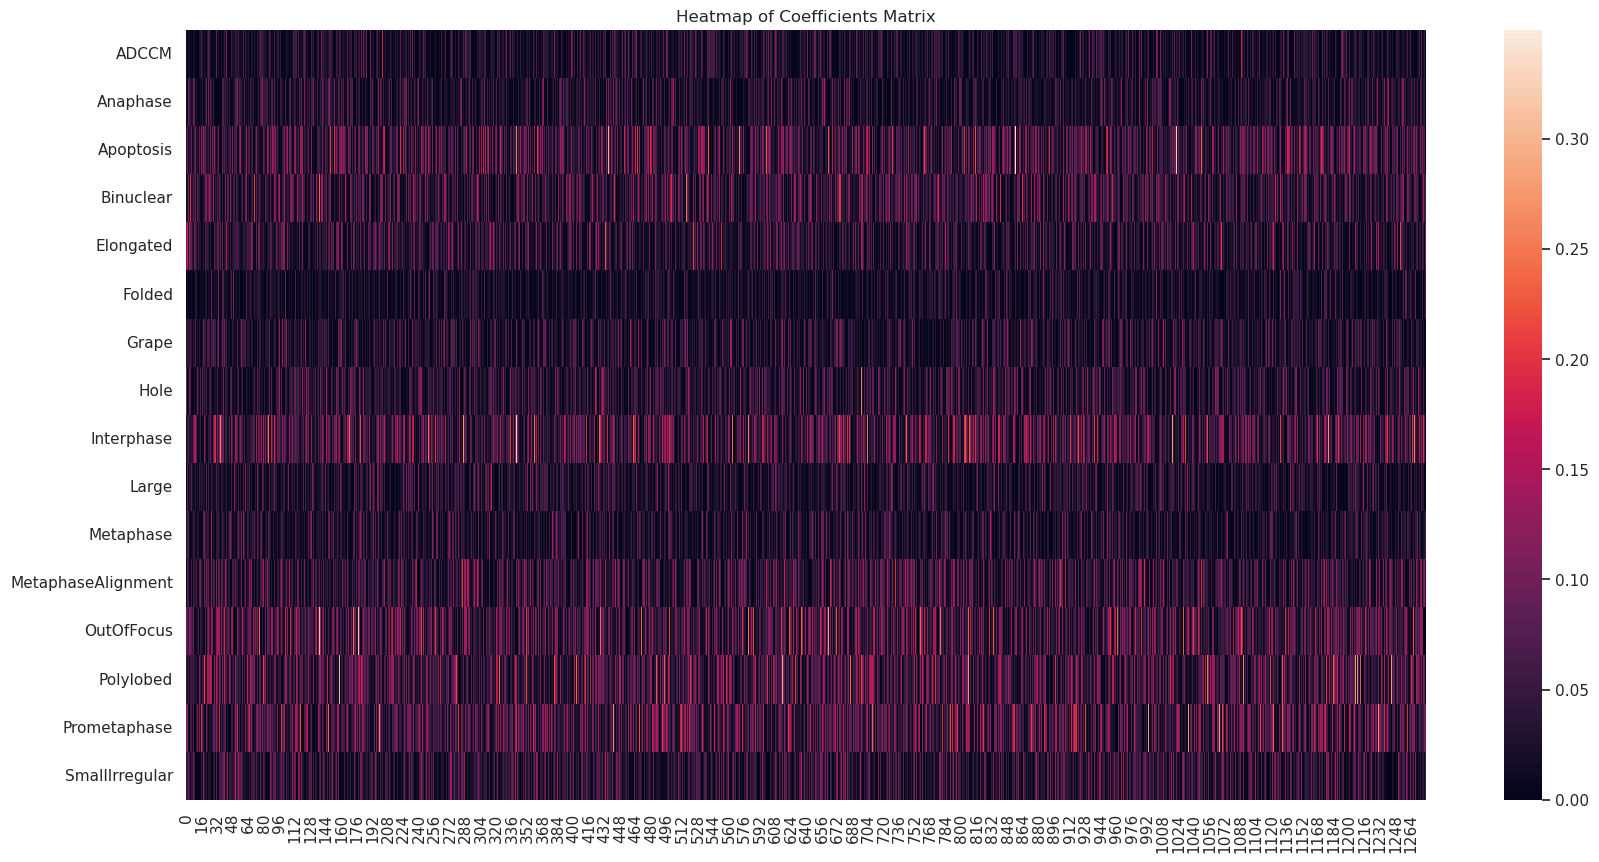

In [11]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Coefficients Matrix")
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


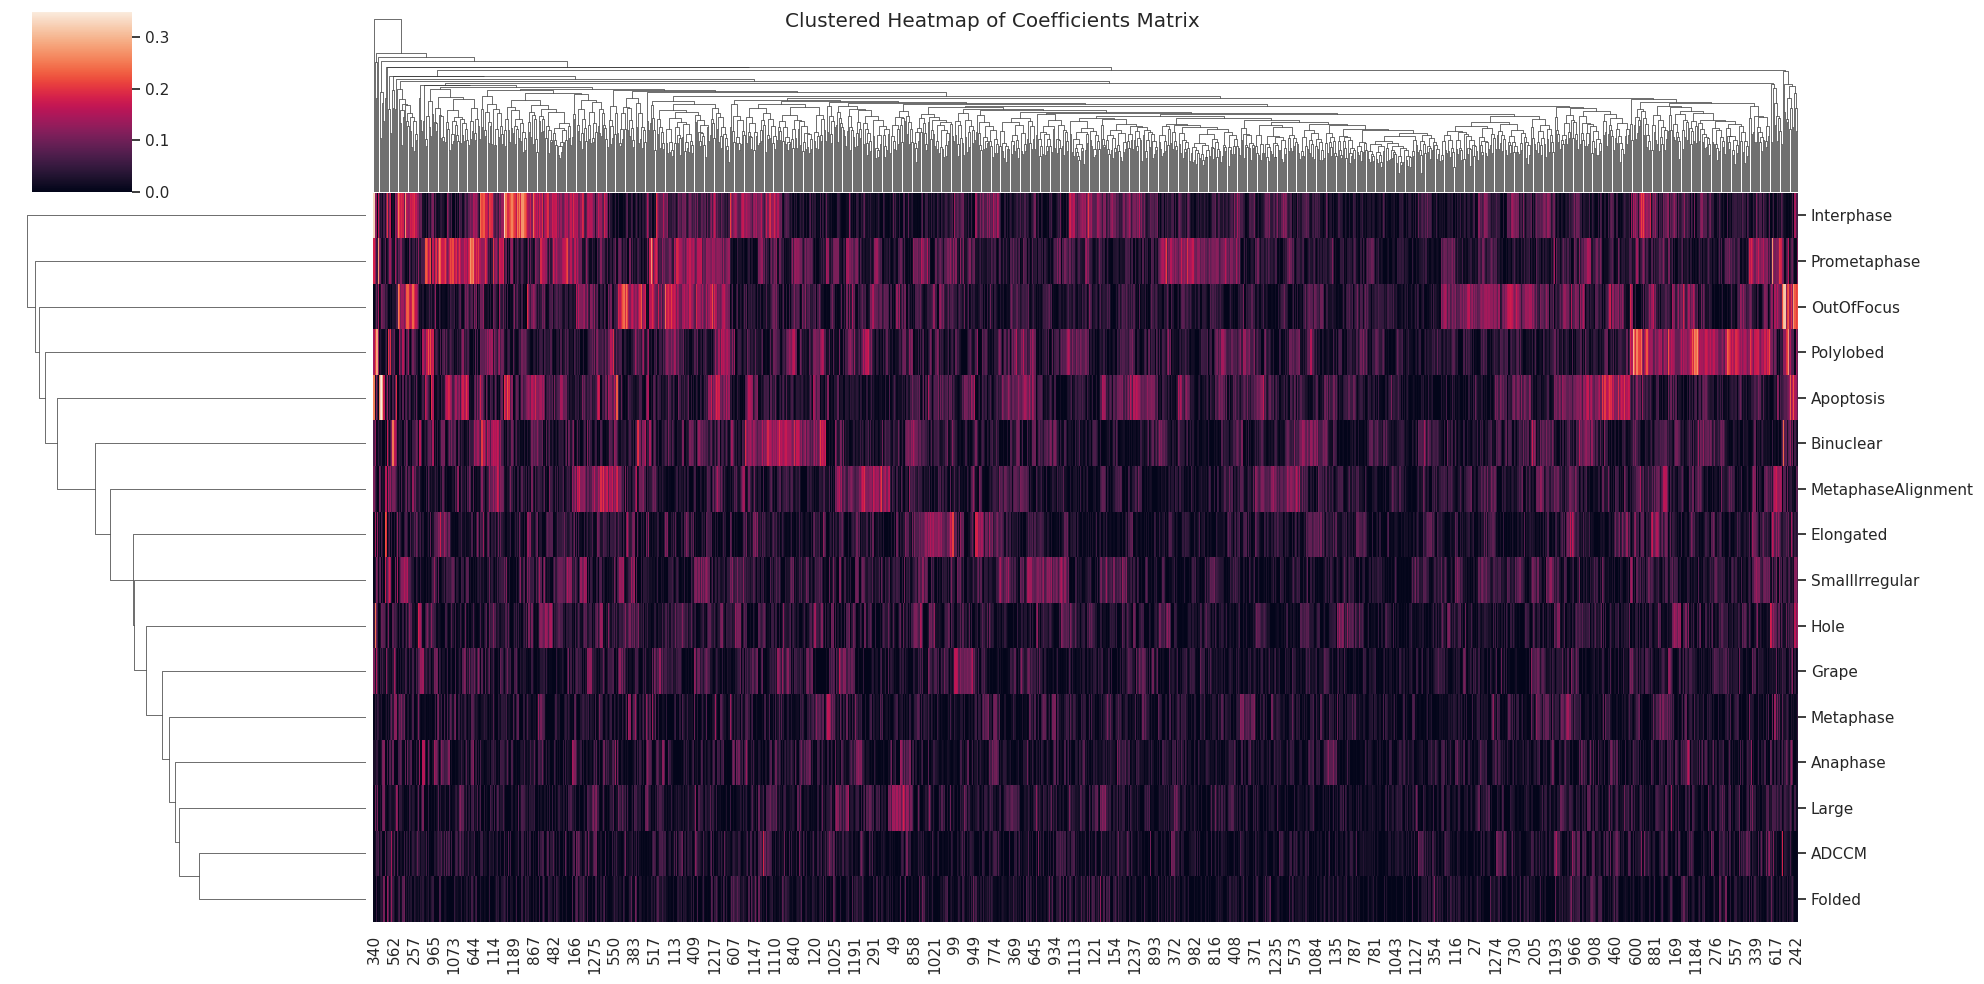

In [12]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

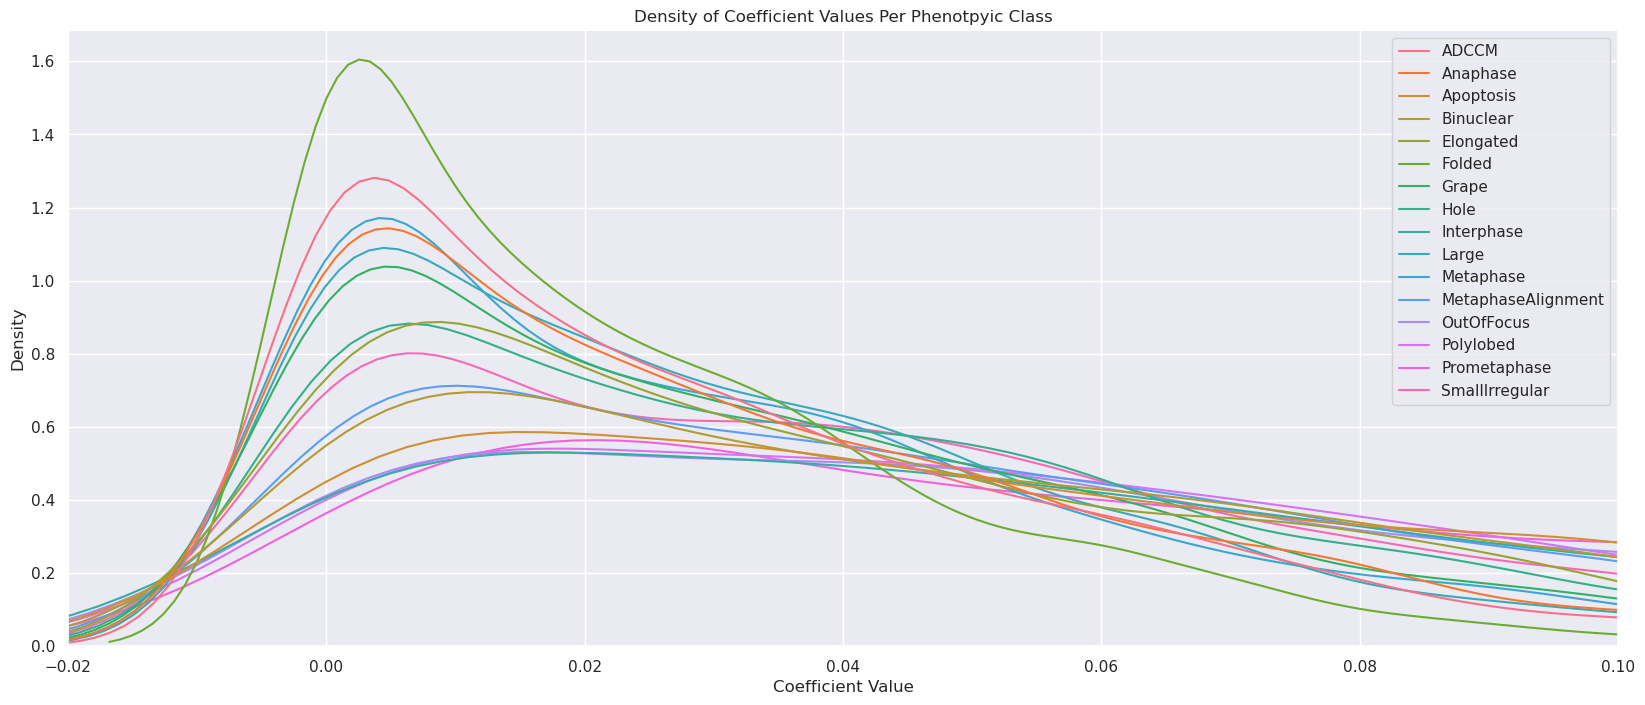

In [13]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

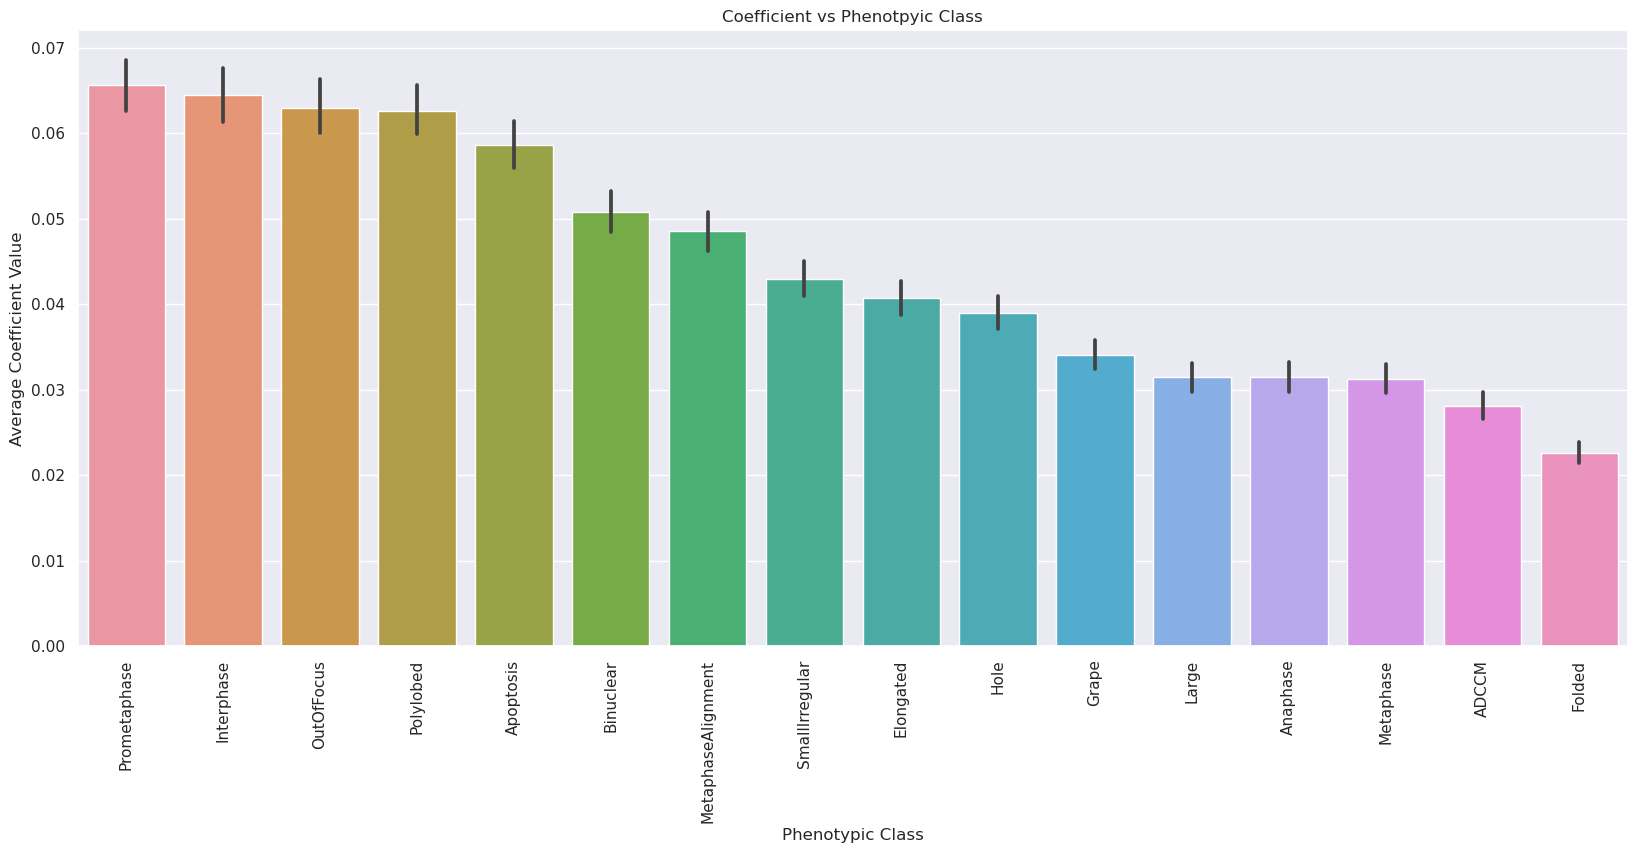

In [14]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

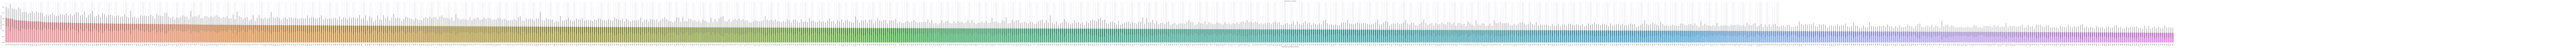

In [15]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)